# Обзор данных.
Перед нами данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно опредилить рыночную стоимость объектов недвижимости. В таблице указаны стандартные данные пользователей как цена квартиры, площадь, этаж, цена, так и данные сгенерированные автоматически.

In [10]:
import pandas as pd

from google.colab import data_table

data_table.enable_dataframe_formatter()

try:
  df = pd.read_csv('drive/MyDrive/datasets/real_estate_data.csv', sep='\t')
except:
  df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

df.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22968,7,6700000.0,54.00,2017-11-08T00:00:00,3,NaN,3.0,36.00,2,NaN,...,10.00,NaN,Санкт-Петербург,22878.0,2419.0,0.0,NaN,0.0,NaN,210.0
19543,11,4550000.0,50.00,2015-12-15T00:00:00,2,NaN,9.0,30.00,7,NaN,...,7.00,NaN,Санкт-Петербург,14358.0,15134.0,0.0,NaN,1.0,433.0,NaN
17390,20,2600000.0,70.00,2017-11-23T00:00:00,3,2.6,5.0,44.00,4,NaN,...,8.30,2.0,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,525.0
23316,16,6300000.0,39.40,2016-05-16T00:00:00,1,3.1,5.0,16.00,2,False,...,11.40,1.0,Пушкин,15696.0,27850.0,1.0,966.0,1.0,450.0,232.0
17791,9,23999088.0,90.00,2017-02-16T00:00:00,2,3.1,8.0,35.90,5,NaN,...,20.00,2.0,Санкт-Петербург,NaN,NaN,NaN,NaN,NaN,NaN,457.0
9093,1,16359000.0,77.90,2019-04-01T00:00:00,1,3.0,11.0,40.40,4,False,...,11.80,NaN,Санкт-Петербург,28282.0,6941.0,2.0,365.0,3.0,215.0,NaN
23138,2,3930000.0,54.00,2018-03-03T00:00:00,2,NaN,19.0,30.00,9,NaN,...,10.00,1.0,Санкт-Петербург,22104.0,23816.0,0.0,NaN,2.0,351.0,49.0
19758,1,4078000.0,43.15,2016-02-11T00:00:00,1,2.7,14.0,15.34,6,NaN,...,19.28,0.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,152.0
12887,5,3100000.0,30.00,2018-10-01T00:00:00,1,NaN,5.0,16.00,4,NaN,...,6.00,NaN,Санкт-Петербург,21816.0,14546.0,0.0,NaN,0.0,NaN,4.0
20095,7,2800000.0,31.60,2017-09-09T00:00:00,1,NaN,5.0,18.10,2,NaN,...,5.10,NaN,Сестрорецк,58223.0,35152.0,1.0,531.0,2.0,192.0,102.0


In [11]:
print(df.shape)

print(df.columns)

(23699, 22)
Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## Вывод
Файл с данным содержит 22 столбца (2 булевых, 3 целочисленных, 14 столбцов с плавающей точкой и 3 столбца с объектами) и 23699 записей.

В 14 из 22 столбцов есть пропущенные значения. Нужно понять какие данные пропущены случайно, какие записаны некорректно и какие пропуски можно игнорировать.

Названия столбцов и их порядок записан не лучшем образом. Их лучше переопределить.

В некоторых столбцах, например floors_total и balcony имеют число с плавающей точнок, а должны быть целочисленными. Проверим это.




# Обработка данных

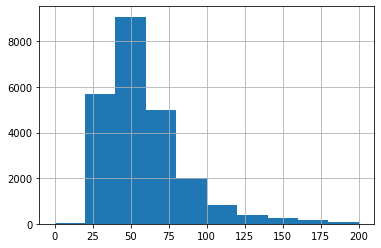

In [4]:
df['total_area'].describe()
df['total_area'].hist(range=(0,200))


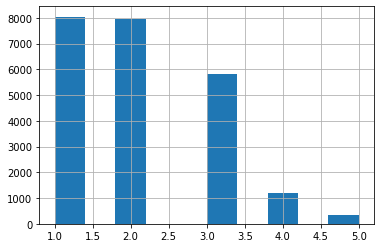

In [5]:
df['rooms'].hist(range=(1,5))

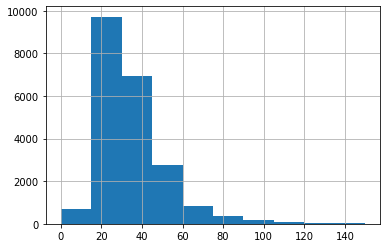

In [6]:
df['living_area'].hist(range=(0,150))

## Работа с пропусками
В таблице присутствуют пропуски. Необходимо определить насколько они критичные.

In [7]:
df.isnull().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

In [8]:
df.isnull().sum().sort_values()/df.shape[0]*100

total_images             0.000000
open_plan                0.000000
floor                    0.000000
rooms                    0.000000
studio                   0.000000
total_area               0.000000
last_price               0.000000
first_day_exposition     0.000000
locality_name            0.206760
floors_total             0.362885
living_area              8.029875
kitchen_area             9.612220
days_exposition         13.422507
ponds_around3000        23.283683
parks_around3000        23.283683
cityCenters_nearest     23.287902
airports_nearest        23.384953
ceiling_height          38.799105
balcony                 48.605426
ponds_nearest           61.559559
parks_nearest           65.909954
is_apartment            88.290645
dtype: float64

Все основные данные заполнены полностью.

In [9]:
df['studio'] == True

0        False
1        False
2        False
3        False
4        False
         ...  
23694    False
23695    False
23696    False
23697    False
23698    False
Name: studio, Length: 23699, dtype: bool